# 차원 축소

## 차원의 저주
* 차원이 증가하면서 학습데이터 수가 차원 수보다 적어져서 성능이 저하되는 현상

## 차원 축소를 위한 접근 방법

### 투영
* 대부분의 실전 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않음
* 많은 특성은 거의 변화가 없는 반면, (앞서 말한 MNIST의 경우처럼) 다른 특성들은 서로 강하게 연관되어 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 부분 공간에(또는 가까이) 놓여 있음
* 모든 훈련 샘플은 이 부분 공간에 수직으로(즉, 샘플과 평면 사이의 가장 짧은 직선을 따라) 투영하면 2D 데이터셋을 얻음
* 그러나 차원 축소에 있어서 투영이 언제나 최선의 방법이 아니며, 많은 경우 스위스 롤 데이터셋처럼 부분 공간이 튀틀리거나 휘어 있기도 해서 단순히 투영을 시키면 스위스 롤의 층이 서로 뭉개짐

### 매니폴드 학습
* 모델을 훈련시키기 전에 훈련세트의 차원을 감소시키면 훈련속도는 빨라지지만 항상 더 낫거나 간단한 솔루션이 되는 건 아니다.
* 이는 전적으로 데이터셋에 달렸다.

## PCA 주성분 분석 Principal Component Analysis
* 가장 인기있는 차원 축소 알고리즘
* 데이터에 가장 가까운 초평면 hyperplane을 정의 -> 데이터를 이 평면에 투영

### 분산 보존
* 저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평면을 선택해야 함
  * 분산이 최대한 보존되는 축을 선택하는 것이 정보를 적게 손실
  * 원본과 투영된 것 사이의 평균 제곱 거리 최소화

### 주성분 PC, Principal Component
* PCA : 훈련세트에서 분산이 최대인 축을 찾는 것 => 첫번째 축에 직교하고 남은 것의 분산을 최대화하는 두번째 축을 찾음, ex) 실선, 점선
* n차원 : n번째 축 찾음, i번째 축 : i번째 주성분, 
* 그림 8-2, 처음 두 축 : 데이터가 놓인 초평면에 있음, 세번째 축 : 초평면에 수직
* PCA : 주성분 벡터 : 원점을 중심으로 하는 단위 벡터, 단위 벡터의 방향이 +,- 두 개이므로 단위 벡터의 방향은 일정하지 않음
* 훈련세트을 조금 섞은 다음 다시 PCA를 적용하면 새로운 PC중 일부가 원래 PC의 반대가능 
* 한쌍의  PC가 서로 회전하거나 서로 바뀔수 있지만 보통은 같은 평면을 구성?
* 특잇값 분해 SVD, Singular Value Decomposition, X=U Sigma V^t, V=[c1 c2 ... cn]
* 공분산 행렬의 고유벡터는 분산이 어느 방향으로 가장 큰지 나타냄. 중앙에 맞춰진 공분산행렬
* Cov = 1/(n-1) X^t X =  V Sigma^2/(n-1) V^t 
*  V가 공분산 행렬의 고유벡터이고 주성분이 됨.  
* scipy.linalg.svd, numpy.linalg.svd => U Sigma V^t 의 V^t=> V : 첫번째 행이 주성분


In [ ]:
import numpy as np
X = np.random.rand(100,2) # 2차원 벡터 100개 생성
Xmean = X.mean(axis=0)
X_centered = X - Xmean
U,s, Vt = np.linalg.svd(X_centered) # 특이값 분해
c1 = Vt.T[:,0]; c2 = Vt.T[:,1] # 첫번째 벡터를 c1, 두번째 벡터를 c2
d1 = [[Xmean[0],  Xmean[1]], [Xmean[0]+c1[0], Xmean[1]+c1[1]]]; d1 = np.array(d1)
d2 = [Xmean, Xmean + c2]; d2 = np.array(d2)   # 위 줄이랑 같은 형식

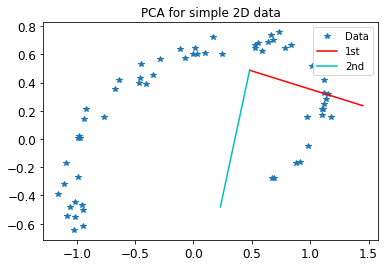

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(X[:,0],X[:,1],'*')
plt.plot(d1[:,0], d1[:,1],'r-')
plt.plot(d2[:,0], d2[:,1],'c-')
plt.legend(['Data','1st','2nd'])
plt.title('PCA for simple 2D data')
plt.show()

* 앞으로 볼 PCA 파이썬 클래스는 데이터 셋의 평균을 0이라 가정, 
* PCA를 직접 구현하거나 다른 라이브러리를 사용할 때 데이터를 원점에 맞추는 걸 잊어선 안됨


### d차원으로 투영하기
* 주성분 분석 후 처음 d개의 주성분 초평면에 투영, 분산을 최대로 보존
* X^d-proj = X V_d

In [ ]:
X = np.random.rand(100,3)
Xmean = X.mean(axis=0)
X_centered = X - Xmean
U,s, Vt = np.linalg.svd(X_centered)
W2 = Vt.T[:,:2]
X2D = X_centered.dot(W2)
X21 = np.array([Xmean, W2.T[0]])
X22 = np.array([Xmean, W2.T[1]])
X2D3D = np.dot(X2D,W2.T) + Xmean

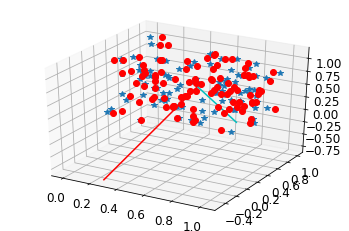

In [ ]:
fig2D = plt.figure(1); ax = fig2D.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2],'*')
ax.plot(X21[:,0], X21[:,1], X21[:,2],'r-')
ax.plot(X22[:,0], X22[:,1], X22[:,2],'c-')
ax.plot(X2D3D[:,0],X2D3D[:,1],X2D3D[:,2],'ro')
plt.show()

### 사이킷런 사용하기

In [ ]:
# 자동으로 중앙에 맞춤
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X2D2 = pca.fit_transform(X)
X21 = np.array([Xmean, W2.T[0]])
X22 = np.array([Xmean, W2.T[1]])
W22 = pca.components_.T
X2D3D2 = np.dot(X2D2,W22.T) + Xmean

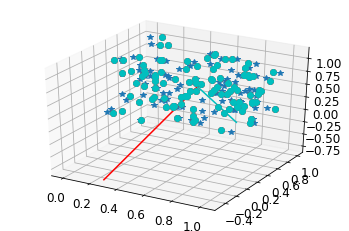

In [ ]:
fig2D = plt.figure(1); ax = fig2D.gca(projection='3d')
ax.plot(X[:,0], X[:,1], X[:,2],'*')
ax.plot(X21[:,0], X21[:,1], X21[:,2],'r-')
ax.plot(X22[:,0], X22[:,1], X22[:,2],'c-')
ax.plot(X2D3D[:,0],X2D3D[:,1],X2D3D[:,2],'ro')  # 사이킷 런 없음
ax.plot(X2D3D2[:,0],X2D3D2[:,1],X2D3D2[:,2],'co') # 사이킷 런
plt.show()

### 설명된 분산의 비율

In [ ]:
# explained_variance_ratio_ 
# explained_variance_ Sigma^2/(n-1)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_)

[0.37210284 0.34595721]
[0.09769849 0.09083375]


### 적절한 차원 수 선택하기
* 축소할 차원 수를 임의로 정하기 보다 충분한 분산(예, 95%)이 될 때까지 더해야 할 차원수 선택
* 데이터 시각화 : 2차원 이나 3차원
* n_components를 지정하지 않으면 min(특성수, 샘플수)
* np.cumsum : 입력배열의 원소를 차례로 누적한 배열

In [ ]:
pca = PCA()#n_components=0.5)
X = np.random.rand(100,20)
pca.fit(X)
cumsum = np.cumsum(pca.explained_variance_ratio_)

# 분산을 50% 보존하고 싶다고 할 때
d = np.argmax(cumsum>= 0.5) + 1 #7
d

7

In [ ]:
# 유지하려는 주성분 수를 지정하기보다 보존하려는 분산의 비율을 설정
# pca = PCA()#n_components=0.95)
# pca.fit(X)
# cumsum = np.cumsum(pca.explained_variance_ratio_)

# 분산을 95% 보존하고 싶다고 할 때 
d = np.argmax(cumsum>= 0.95) + 1 #18
d

#X_reduced = pca.fit_transform(X)
# 설명된 분산을 차원 수에 대한 함수로 그리는 방법 (그림 8-8)
# 설명된 분산의 빠른 성장이 멈추는 변곡점/엘보우 (100이면 충분)

18

### 압축을 위한 PCA
* 차원 축소 후 훈련샘플의 크기가 줄어듬
* MNIST 데이터셋에 분산의 95%를 유지하도록 PCA 적용: 784개 특성=>약 150개
* 대부분의 분산은 유지되지만 데이터 셋은 원본크기의 20% 미만
* 압축된 데이터셋에 PCA 투영의 변환을 반대로 적용하여 784개 차원을 되돌릴 수 있음
* 5%의 분산을 잃어서 원본 데이터셋을 얻을 수는 없지만 매우 비슷
* 재구성 오차 Reconstruction Error: 원본 데이터와 재구성 데이터 사이의 평균제곱거리


In [ ]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1, as_frame=False)
X = mnist["data"]

In [ ]:
Xt = X[0] 
Xt.shape

(784,)

In [ ]:
X_train = Xt.reshape(28,28)
pca = PCA(n_components=0.95) # 95%로 분산을 유지
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)
# 역변환 공식 X_recovered = X_d-proj W_d^t
# X : 70,000*784  X_reduced : 70,000*154  components_ : 154*784
# 1개

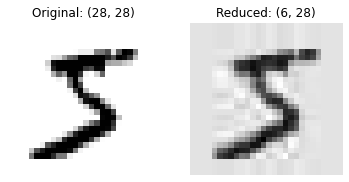

In [ ]:
plt.figure()
plt.subplot(1,2,1)
plt.imshow(X_train, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(X_recovered, cmap='binary'); plt.axis('off'); plt.title('Reduced: '+str(a))
plt.show()

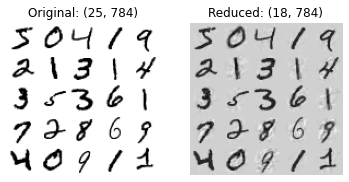

In [ ]:
# 25개
X_train = X[:25,:]
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
a=pca.components_.shape
X_recovered = pca.inverse_transform(X_reduced)
Xtt = np.zeros((5*28,5*28)); Xrec = np.zeros((5*28,5*28))
for i in range(25):
    ic = np.mod(i,5); ir = int((i - ic)/5)
    Xtt[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_train[i,:].reshape(28,28) 
    Xrec[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_recovered[i,:].reshape(28,28) 
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xtt, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(Xrec, cmap='binary'); plt.axis('off'); plt.title('Reduced: '+str(a))
plt.show()

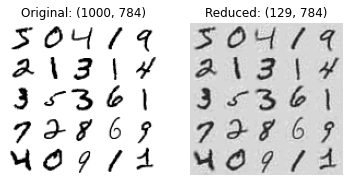

In [ ]:
# 1000개중 25개
X_train = X[:1000,:]
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
a=pca.components_.shape
X_recovered = pca.inverse_transform(X_reduced)
Xtt = np.zeros((5*28,5*28)); Xrec = np.zeros((5*28,5*28))
for i in range(25):
    ic = np.mod(i,5); ir = int((i - ic)/5)
    Xtt[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_train[i,:].reshape(28,28) 
    Xrec[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_recovered[i,:].reshape(28,28) 
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xtt, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(Xrec, cmap='binary'); plt.axis('off'); plt.title('Reduced: '+str(a))
plt.show()

### 랜덤 PCA
* svd_solver = randomized : **처음 d성분에 대한 근삿값을 빠르게 찾음**
* SVD 복잡도 : O(m*n^2) + O(n^3), 랜덤PCA 복잡도 : O(m*d^2) + O(d^3)
* d가 n보다 많이 작으면 완전 SVD 보다 훨씬 빠름

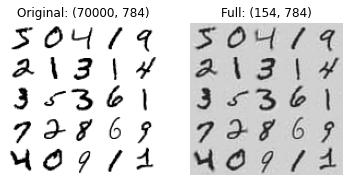

In [ ]:
X_train = X
pca = PCA(n_components=0.95, svd_solver="full")
X_reduced = pca.fit_transform(X_train)
a=pca.components_.shape
X_recovered = pca.inverse_transform(X_reduced)
Xtt = np.zeros((5*28,5*28)); Xrec = np.zeros((5*28,5*28))
for i in range(25):
    ic = np.mod(i,5); ir = int((i - ic)/5)
    Xtt[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_train[i,:].reshape(28,28) 
    Xrec[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_recovered[i,:].reshape(28,28) 
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xtt, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(Xrec, cmap='binary'); plt.axis('off'); plt.title('Full: '+str(a))
plt.show()

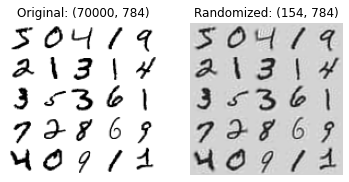

In [ ]:
rnd_pca = PCA(n_components=154,svd_solver="randomized")
X_reduced = rnd_pca.fit_transform(X_train)
a=rnd_pca.components_.shape
X_recovered = rnd_pca.inverse_transform(X_reduced)
Xtt = np.zeros((5*28,5*28)); Xrec = np.zeros((5*28,5*28))
for i in range(25):
    ic = np.mod(i,5); ir = int((i - ic)/5)
    Xtt[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_train[i,:].reshape(28,28) 
    Xrec[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_recovered[i,:].reshape(28,28) 
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xtt, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(Xrec, cmap='binary'); plt.axis('off'); plt.title('Randomized: '+str(a))
plt.show()

* 속도가 별 차이 안 남.
* svd_solver 기본값 "auto",
* max(m,n)>500 or d< 0.8*max(m,n) => 랜덤 PCA, 아니면 완전 PCA
* svd_solver="full" : 완전 PCA

### 점진적 PCA, IPCA: Incremental PCA
* 미니 배치를 사용
* PCA 구현의 문제 : SVD 실현하기 위해 전체 훈련세트을 메모리에
* 훈련 세트를 미니배치로 나눈 다음, IPCA에 한번에 하나씩 주입
* 훈련 세트가 클때 유용, 온라인으로 PCA 적용

In [ ]:
# MNIST 데이터셋을 np.array_split()를 사용해 100개의 미니배치로 나누고
#  IPCA에 주입하여 차원을 154개로 줄임. 전체훈련세트을 사용하는 fit() 말고,
#  partial_fit() 메서드를 미니배치마다 호출
from sklearn.decomposition import IncrementalPCA

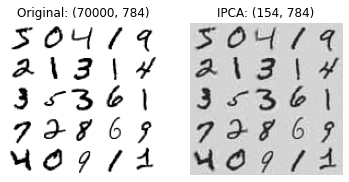

In [ ]:
n_batches = 100
inc_pca = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches):
    inc_pca.partial_fit(X_batch)
X_reduced = inc_pca.transform(X_train) 

a = inc_pca.components_.shape
X_recovered = inc_pca.inverse_transform(X_reduced)
Xtt = np.zeros((5*28,5*28)); Xrec = np.zeros((5*28,5*28))
for i in range(25):
    ic = np.mod(i,5); ir = int((i - ic)/5)
    Xtt[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_train[i,:].reshape(28,28) 
    Xrec[ir*28:(ir+1)*28, ic*28:(ic+1)*28] = X_recovered[i,:].reshape(28,28) 
plt.figure()
plt.subplot(1,2,1)
plt.imshow(Xtt, cmap='binary'); plt.axis('off'); plt.title('Original: '+str(X_train.shape))
plt.subplot(1,2,2)
plt.imshow(Xrec, cmap='binary'); plt.axis('off'); plt.title('IPCA: '+str(a))
plt.show()

## 커널 PCA

In [ ]:
# 스위스 롤
from sklearn.datasets import make_swiss_roll
X,t = make_swiss_roll(n_samples=1000) #, noise=0.0, random_state=None)
y = X[:,0] > 5

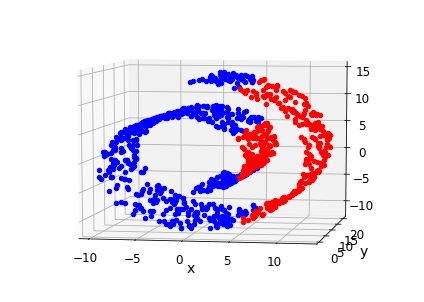

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X[j,0],X[j,1],X[j,2],color='red')
    else:
        ax1.scatter(X[j,0],X[j,1],X[j,2],color='blue')
plt.xlabel('x'); plt.ylabel('y')#; plt.zlabel('z')
plt.show()

In [ ]:
from sklearn.decomposition import KernelPCA
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.04, # kernel: rbf 사용
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_recovered = rbf_pca.inverse_transform(X_reduced)

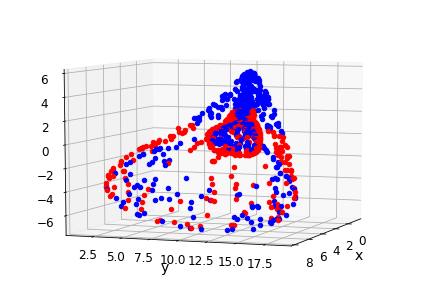

In [ ]:
# elevation 위도, azimuth 경도
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=20)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='red')
    else:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='blue')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

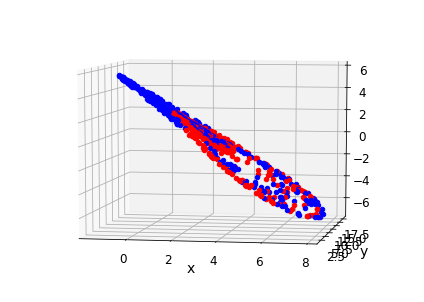

In [ ]:
# 각도를 좀 바꿔서 보자
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=-80)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='red')
    else:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='blue')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

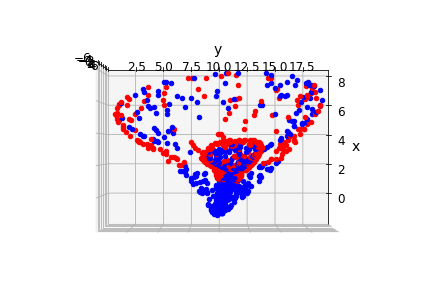

In [ ]:
# elev=-90: 바닥에서 보았을 때
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=-90, azim=0)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='red')
    else:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='blue')
plt.xlabel('x'); plt.ylabel('y')
plt.show()

### 커널 선택과 파라미터 튜닝

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

In [ ]:
clf = Pipeline([
    ("kpca", KernelPCA(n_components=2)),
    ("log_reg",LogisticRegression())
    ])

param_grid = [{
    "kpca__gamma": np.linspace(0.03, 0.05, 10),
    "kpca__kernel": ["rbf","sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X,y)

print(grid_search.best_params_)

{'kpca__gamma': 0.03, 'kpca__kernel': 'sigmoid'}


In [ ]:
rbf_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.03,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(X,X_preimage)

20.28041581291465

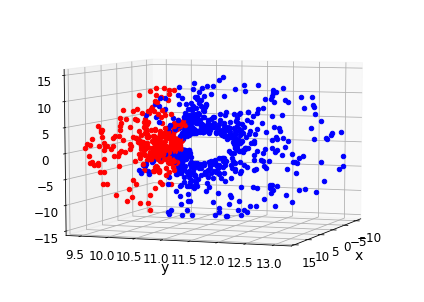

In [ ]:
X_recovered = X_preimage
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection="3d", elev=7, azim=20)# elev=-90, azim=0)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='red')
    else:
        ax1.scatter(X_recovered[j,0],X_recovered[j,1],X_recovered[j,2],color='blue')
plt.xlabel('x'); plt.ylabel('y') #; plt.zlabel('z')
plt.show()

## LLE 지역 선형 임베딩 Locally Linear Embedding

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10) # fit_inverse_transform이 빠진다는 것이 특징

X_reduced = lle.fit_transform(X)

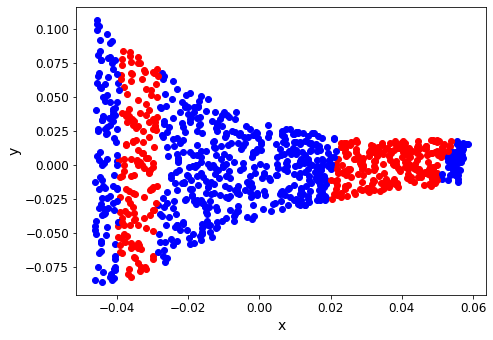

In [ ]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111) #, , elev=7, azim=20)# elev=-90, azim=0)
ax1.set_position([0, 0, 0.95, 1])
for j in range(X.shape[0]):
    if y[j]:
        ax1.scatter(X_reduced[j,0],X_reduced[j,1],color='red')
    else:
        ax1.scatter(X_reduced[j,0],X_reduced[j,1],color='blue')
plt.xlabel('x'); plt.ylabel('y') #; plt.zlabel('z')
plt.show()

# 추가활동

## 다른 차원 축소
* 랜덤 투영 Random Projection
* 다차원 스케일링 MDS MultiDimensional Scaling
* isomap: geodesic distance 유지
* t-SNE, t-distributed Stochastic Neighbor Embedding
* LDA, 선형판별분석, Linear Discriminant Analysis

### 랜덤 투영
* [도큐먼트](https://scikit-learn.org/stable/modules/random_projection.html)
* 유클리드 공간에 있는 점 집합의 차원을 줄이는 데 사용되는 기술
* 더 빠른 처리 시간과 더 작은 모델 크기를 위해 통제된 양의 정확도(additinal variance)를 교환하여 데이터의 차원을 줄이는 간단하고 계산적으로 효율적인 방법
* 유형: Gaussian random project / Sparse random project

In [ ]:
# 가우시안 랜덤 투영
import numpy as np
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)

In [ ]:
# 희소 랜덤 투영
# 메모리 효율성이 훨씬 높고 투시된 데이터를 더 빠르게 계산 가능
import numpy as np
from sklearn import random_projection
X = np.random.rand(100, 10000)
transformer = random_projection.SparseRandomProjection()
X_new = transformer.fit_transform(X)
X_new.shape

(100, 3947)

### MDS 다차원 스케일링
* [도큐먼트](https://scikit-learn.org/stable/modules/random_projection.html)
* 기본적으로 비지도 학습에서 스케일 문제를 해결
* 모든 점들 간의 거리 정보를 보존
* 단점은 고차원의 원 공간에서의 가까운 점들 간의 구조를 보존하지 못함 -> 고차원 공간의 시각화에 적합한 방법X
* parameters
  - n_components: 임베디드 공간의 차수

In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import MDS
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
embedding = MDS(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

### isomap
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.Isomap.html)
* Isometric Mapping을 통한 비선형 차원 축소
* PCA와 MDS의 주요 알고리즘 기능을 결합
* parameters
  - n_neighbors: 각 포인트에 대해 고려할 이웃의 수
  - radius: 이웃의 거리를 제한
  - path_method: 최당 경로를 찾는 데 사용하는 방법
    - auto: 최상의 알고리즘을 자동으로 선택하려고 시도
    - RW: Floyd-Warshall 알고리즘
    - D: Dijkstra의 알고리즘
    - neighbors_algorithm: 가장 가까운 이웃 검색에 사용할 알고리즘


In [ ]:
from sklearn.datasets import load_digits
from sklearn.manifold import Isomap
X, _ = load_digits(return_X_y=True)
X.shape

(1797, 64)

In [ ]:
embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X[:100])
X_transformed.shape

(100, 2)

### t-SNE
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html)
* 데이터 포인트 간의 유사성을 결합 확률로 변환하고 저차원 임베딩과 고차원 데이터의 결합 확률 간의 Kullback-Leiber 발산을 최소화하려고 시도
* parameters
  - n_components: 임베디드 공간의 차수
  - perplexity: 가장 가까운 이웃수와 관련
  - early_exaggeration: 공간의 크기를 제어
  - learning_rate: 학습률
  - min_grad_norm: gradient가 이 임계값 미만이면 최적화가 중지
  - angle: 속도와 정확도간의 균형과 관련
  - init: 임베딩 초기화. PCA 초기화는 미리 계산된 거리와 함께 사용할 수 없으며 일반적으로 임의 초기화보다 전역적으로 더 안정적

In [ ]:
import numpy as np
from sklearn.manifold import TSNE
X = np.array([[0, 0, 0], [0, 1, 1], [1, 0, 1], [1, 1, 1]])
X_embedded = TSNE(n_components=2, learning_rate='auto',
                  init='pca', perplexity=3).fit_transform(X)
X_embedded.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


(4, 2)

### LDA 선형 판별 분석
* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.discriminant_analysis.LinearDiscriminantAnalysis.html)
* 분류모델과 차원축소까지 동시에 사용하는 알고리즘
* LDA는 다음과 같은 두 가지 성질을 가진 벡터를 찾음
  - 데이터 포인트들을 투영시켰을 때 각 클래스에 속하는 투영들의 평균간의 거리의 합이 최대가 되게 하는 벡터. 다른 말로, 클래스 간의 거리가 최대가 되게 하는 벡터
  * 데이터 포인트들을 투영시켰을 때 클래스 내의 투영들의 분산이 최소가 되게 하는 벡터. 다른 말로, 클래스 내의 분산이 최소가 되게 하는 벡터
* 다시말해, LDA는 클래스 내의 분산이 최소가 되게 하고, 클래스 간의 거리가 최대가 되게 하는 벡터를 찾아 데이터 포인트들을 투영

In [ ]:
import numpy as np
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
X = np.array([[-1, -1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
y = np.array([1, 1, 1, 2, 2, 2])
clf = LinearDiscriminantAnalysis()
clf.fit(X, y)

print(clf.predict([[-0.8, -1]]))

[1]
